In [8]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [9]:
# load iris data set
df =pd.read_csv("Iris.csv")
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [10]:
#binning


b = np.zeros(150)
# take 1st column among 4 column of data set
b = np.sort(X["SepalLengthCm"])  # sort the array
# create bins
bin1 = np.zeros((30, 5))
bin2 = np.zeros((30, 5))
bin3 = np.zeros((30, 5))
# Bin mean
for i in range(0, 150, 5):
    k = int(i / 5)
    mean = (b[i] + b[i + 1] + b[i + 2] + b[i + 3] + b[i + 4]) / 5
    for j in range(5):
        bin1[k, j] = mean
print("Bin Mean: \n", bin1)

Bin Mean: 
 [[4.4  4.4  4.4  4.4  4.4 ]
 [4.62 4.62 4.62 4.62 4.62]
 [4.78 4.78 4.78 4.78 4.78]
 [4.88 4.88 4.88 4.88 4.88]
 [4.96 4.96 4.96 4.96 4.96]
 [5.   5.   5.   5.   5.  ]
 [5.06 5.06 5.06 5.06 5.06]
 [5.1  5.1  5.1  5.1  5.1 ]
 [5.18 5.18 5.18 5.18 5.18]
 [5.38 5.38 5.38 5.38 5.38]
 [5.46 5.46 5.46 5.46 5.46]
 [5.52 5.52 5.52 5.52 5.52]
 [5.6  5.6  5.6  5.6  5.6 ]
 [5.7  5.7  5.7  5.7  5.7 ]
 [5.74 5.74 5.74 5.74 5.74]
 [5.8  5.8  5.8  5.8  5.8 ]
 [5.94 5.94 5.94 5.94 5.94]
 [6.02 6.02 6.02 6.02 6.02]
 [6.1  6.1  6.1  6.1  6.1 ]
 [6.22 6.22 6.22 6.22 6.22]
 [6.3  6.3  6.3  6.3  6.3 ]
 [6.34 6.34 6.34 6.34 6.34]
 [6.4  6.4  6.4  6.4  6.4 ]
 [6.5  6.5  6.5  6.5  6.5 ]
 [6.66 6.66 6.66 6.66 6.66]
 [6.7  6.7  6.7  6.7  6.7 ]
 [6.84 6.84 6.84 6.84 6.84]
 [7.02 7.02 7.02 7.02 7.02]
 [7.34 7.34 7.34 7.34 7.34]
 [7.74 7.74 7.74 7.74 7.74]]


In [11]:
# Bin boundaries
for i in range(0, 150, 5):
    k = int(i / 5)
    for j in range(5):
        if (b[i + j] - b[i]) < (b[i + 4] - b[i + j]):
            bin2[k, j] = b[i]
        else:
            bin2[k, j] = b[i + 4]
print("Bin Boundaries: \n", bin2)


Bin Boundaries: 
 [[4.3 4.5 4.5 4.5 4.5]
 [4.6 4.6 4.6 4.6 4.7]
 [4.7 4.8 4.8 4.8 4.8]
 [4.8 4.9 4.9 4.9 4.9]
 [4.9 4.9 5.  5.  5. ]
 [5.  5.  5.  5.  5. ]
 [5.  5.  5.1 5.1 5.1]
 [5.1 5.1 5.1 5.1 5.1]
 [5.1 5.2 5.2 5.2 5.2]
 [5.3 5.4 5.4 5.4 5.4]
 [5.4 5.4 5.5 5.5 5.5]
 [5.5 5.5 5.5 5.5 5.6]
 [5.6 5.6 5.6 5.6 5.6]
 [5.7 5.7 5.7 5.7 5.7]
 [5.7 5.7 5.7 5.8 5.8]
 [5.8 5.8 5.8 5.8 5.8]
 [5.9 5.9 5.9 6.  6. ]
 [6.  6.  6.  6.  6.1]
 [6.1 6.1 6.1 6.1 6.1]
 [6.2 6.2 6.2 6.2 6.3]
 [6.3 6.3 6.3 6.3 6.3]
 [6.3 6.3 6.3 6.4 6.4]
 [6.4 6.4 6.4 6.4 6.4]
 [6.5 6.5 6.5 6.5 6.5]
 [6.6 6.6 6.7 6.7 6.7]
 [6.7 6.7 6.7 6.7 6.7]
 [6.8 6.8 6.8 6.9 6.9]
 [6.9 6.9 6.9 7.2 7.2]
 [7.2 7.2 7.2 7.6 7.6]
 [7.7 7.7 7.7 7.7 7.9]]


In [12]:
# Bin median
for i in range(0, 150, 5):
    k = int(i / 5)
    for j in range(5):
        bin3[k, j] = b[i + 2]
print("Bin Median: \n", bin3)

Bin Median: 
 [[4.4 4.4 4.4 4.4 4.4]
 [4.6 4.6 4.6 4.6 4.6]
 [4.8 4.8 4.8 4.8 4.8]
 [4.9 4.9 4.9 4.9 4.9]
 [5.  5.  5.  5.  5. ]
 [5.  5.  5.  5.  5. ]
 [5.1 5.1 5.1 5.1 5.1]
 [5.1 5.1 5.1 5.1 5.1]
 [5.2 5.2 5.2 5.2 5.2]
 [5.4 5.4 5.4 5.4 5.4]
 [5.5 5.5 5.5 5.5 5.5]
 [5.5 5.5 5.5 5.5 5.5]
 [5.6 5.6 5.6 5.6 5.6]
 [5.7 5.7 5.7 5.7 5.7]
 [5.7 5.7 5.7 5.7 5.7]
 [5.8 5.8 5.8 5.8 5.8]
 [5.9 5.9 5.9 5.9 5.9]
 [6.  6.  6.  6.  6. ]
 [6.1 6.1 6.1 6.1 6.1]
 [6.2 6.2 6.2 6.2 6.2]
 [6.3 6.3 6.3 6.3 6.3]
 [6.3 6.3 6.3 6.3 6.3]
 [6.4 6.4 6.4 6.4 6.4]
 [6.5 6.5 6.5 6.5 6.5]
 [6.7 6.7 6.7 6.7 6.7]
 [6.7 6.7 6.7 6.7 6.7]
 [6.8 6.8 6.8 6.8 6.8]
 [7.  7.  7.  7.  7. ]
 [7.3 7.3 7.3 7.3 7.3]
 [7.7 7.7 7.7 7.7 7.7]]


In [13]:
#summary
mean = X.mean(axis=0)
median= X.median(axis=0)
quantile = X.quantile()
min = X.min()
max = X.max()
sd = X.std()
var = X.var()
mod=[]
quartiles = []
for i in X:
    mod.append(X[i].mode())
    quartiles.append(percentile(X[i], [25, 50, 75]))


df1 = pd.DataFrame({"MEAN":mean,"MEDIAN":median,"MAX":max,
                    "MODE": mod,"MIN":min,"QUANTILE":quantile,
                    "Q1 Q2 Q3":quartiles,"VARIANCE":var,"STD":sd})


print(df1.to_markdown())

|               |    MEAN |   MEDIAN |   MAX |   MODE |   MIN |   QUANTILE | Q1 Q2 Q3         |   VARIANCE |      STD |
|:--------------|--------:|---------:|------:|-------:|------:|-----------:|:-----------------|-----------:|---------:|
| SepalLengthCm | 5.84333 |     5.8  |   7.9 |    5   |   4.3 |       5.8  | [5.1 5.8 6.4]    |   0.685694 | 0.828066 |
| SepalWidthCm  | 3.054   |     3    |   4.4 |    3   |   2   |       3    | [2.8 3.  3.3]    |   0.188004 | 0.433594 |
| PetalLengthCm | 3.75867 |     4.35 |   6.9 |    1.5 |   1   |       4.35 | [1.6  4.35 5.1 ] |   3.11318  | 1.76442  |
| PetalWidthCm  | 1.19867 |     1.3  |   2.5 |    0.2 |   0.1 |       1.3  | [0.3 1.3 1.8]    |   0.582414 | 0.763161 |


<Figure size 1200x600 with 0 Axes>

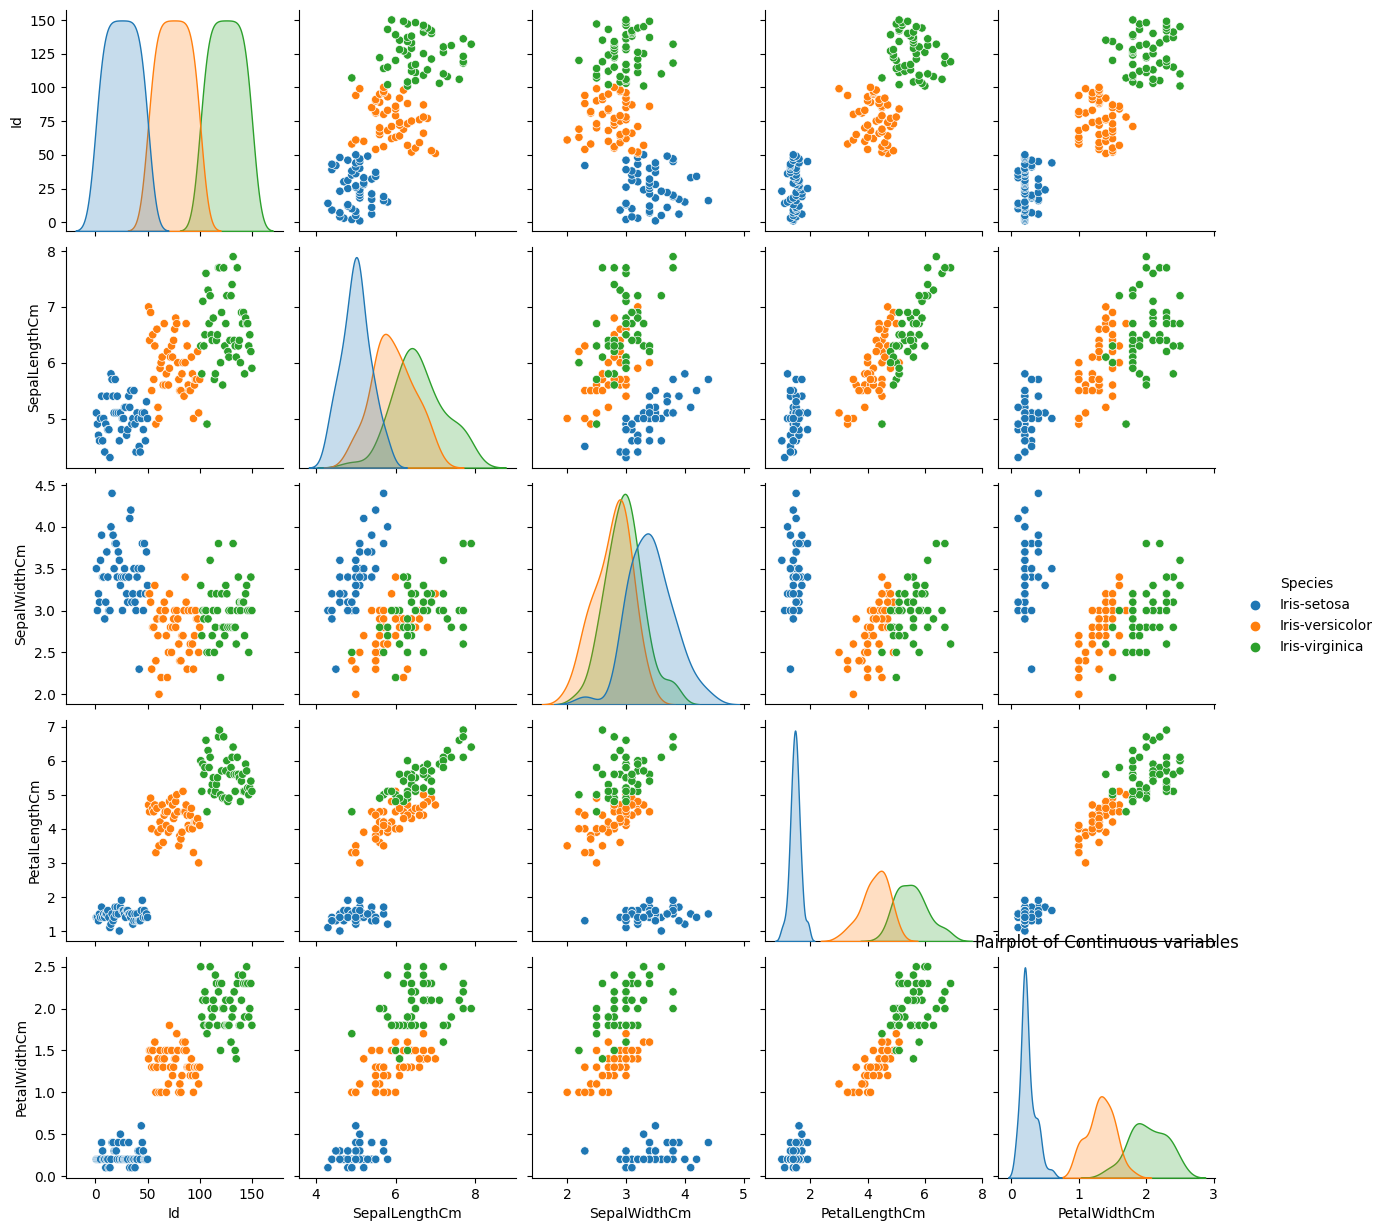

In [14]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=df, hue='Species')
plt.title('Pairplot of Continuous variables')
plt.show()


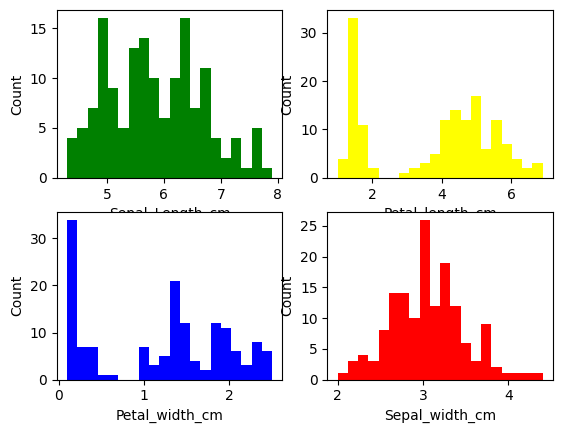

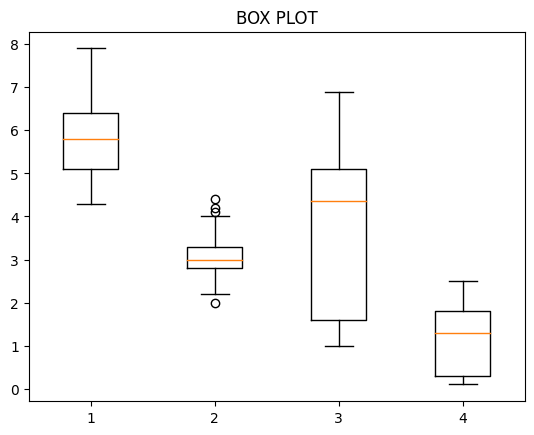

In [15]:
plt.subplot(2,2,1)
data= X["SepalLengthCm"]
plt.hist(data, bins=20, color="green")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")

plt.subplot(2,2,2)
data= X["PetalLengthCm"]
plt.hist(data, bins=20, color="yellow")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")

plt.subplot(2,2,3)
data= X["PetalWidthCm"]
plt.hist(data, bins=20, color="blue")
plt.xlabel("Petal_width_cm")
plt.ylabel("Count")

plt.subplot(2,2,4)
data= X["SepalWidthCm"]
plt.hist(data, bins=20, color="red")
plt.xlabel("Sepal_width_cm")
plt.ylabel("Count")

plt.show()

plt.boxplot(X)
plt.title("BOX PLOT")
plt.show()

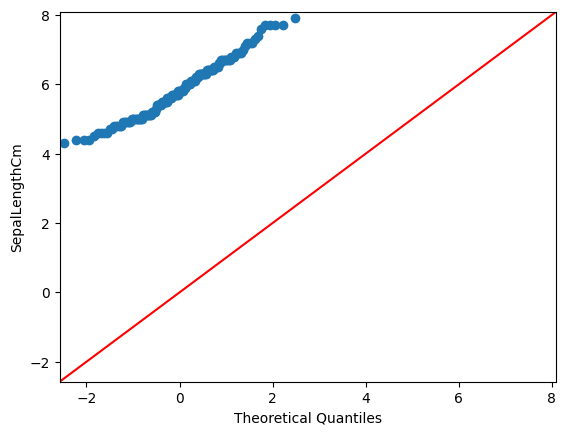

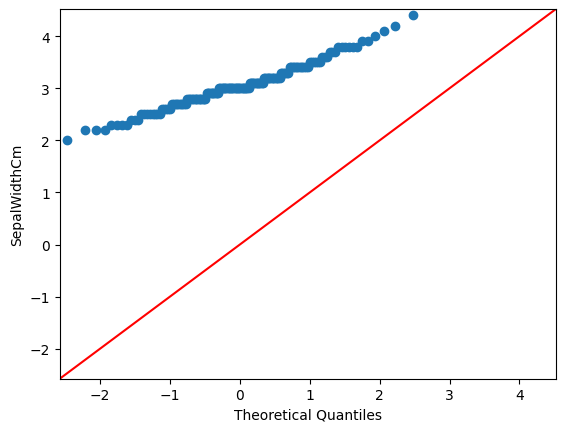

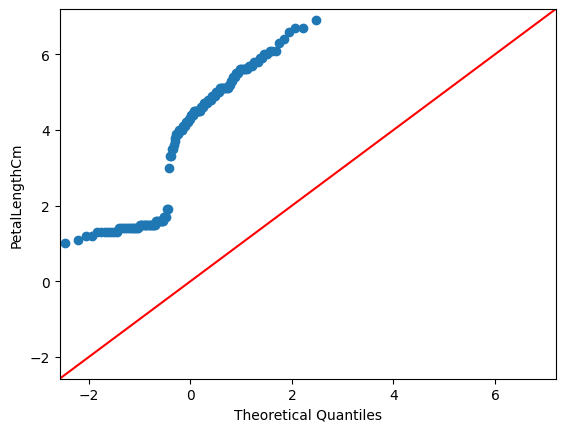

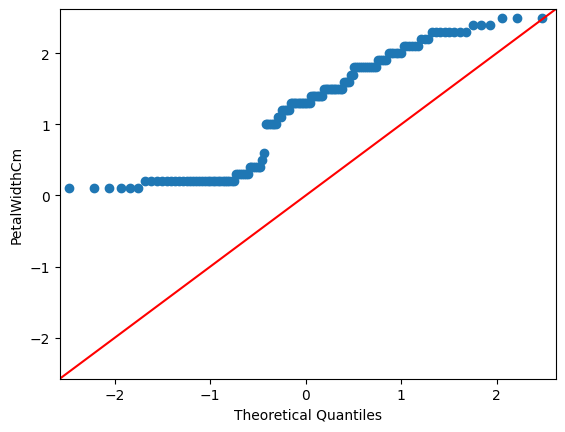

In [16]:
#quantile-quantile plots
for i in X:
    sm.qqplot(X[i], line='45')
    py.ylabel(i)
    py.show()
